# Exploring Relationships Between Athletic Tests and Football Performance
#### Deana Moghaddas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load and display datasets
pff = pd.read_csv("fake_grades.csv") # PFF (pro football focus) - how we measure football on-field performance (higher = better)
df = pd.read_csv("take_home_data_final.csv") # physical and psychological tests

# convert spaces in variables into underscores (needed for later)
df.columns = df.columns.str.replace(' ', '_')
pff.columns = pff.columns.str.replace(' ', '_')

display(pff.head())
display(df.head())

,Date,Person_ID,PFF_Tackling_Grade
0,8/31/24,1,75
1,9/7/24,1,68
2,9/14/24,1,61
3,9/21/24,1,64
4,9/28/24,1,62


,Position,Person_ID,Date,Bodyweight,Jump_Height,Peak_Power,Concentric_Impulse,Eccentric_Duration,Cardio_Load,FIELD_TIME,TOTAL_DISTANCE,PEAK_PLAYER_LOAD,IMPULSE_CONTROL,PERCEPTION_SPEED,INSTINCTIVE_LEARNING,FAT_MASS,MUSCLE_MASS
0,LB,1.0,1/3/24,258.42,32.06,NaN,315.53,0.44,5.52,7290.47,NaN,6.16,NaN,NaN,NaN,NaN,NaN
1,LB,1.0,1/11/24,258.71,32.77,NaN,319.44,0.43,5.33,NaN,1954.07,5.25,NaN,NaN,NaN,NaN,NaN
2,LB,1.0,1/15/24,257.96,32.65,NaN,NaN,0.43,6.21,7470.83,1856.11,5.25,87.0,75.0,32.0,56.68,201.28
3,LB,1.0,1/20/24,257.39,NaN,NaN,315.19,0.41,6.00,NaN,2001.20,4.54,NaN,NaN,NaN,NaN,NaN
4,LB,1.0,1/23/24,257.71,32.18,NaN,311.35,0.42,6.50,7309.05,2451.89,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Exploratory Data Analysis (EDA)

## A. Examine the dataset to understand structure, quality, and missingness.

In [6]:
# determine shape of datasets
print(pff.shape) # PFF has 195 rows, 3 columns
print(df.shape) # DF has 1121 rows, 17 columns

(195, 3)
(1121, 17)


In [7]:
df.describe()

,Person_ID,Bodyweight,Jump_Height,Peak_Power,Concentric_Impulse,Eccentric_Duration,Cardio_Load,FIELD_TIME,TOTAL_DISTANCE,PEAK_PLAYER_LOAD,IMPULSE_CONTROL,PERCEPTION_SPEED,INSTINCTIVE_LEARNING,FAT_MASS,MUSCLE_MASS
count,1114.000000,905.000000,892.000000,874.000000,896.000000,889.000000,897.000000,925.000000,900.000000,889.000000,15.000000,15.000000,15.000000,60.000000,60.000000
mean,7.858169,240.297072,39.800897,6194.472540,300.801350,0.462801,6.614348,4987.675632,7105.815289,5.707593,54.466667,56.066667,59.666667,51.038667,183.045333
std,4.301068,39.826249,5.941880,1134.691104,47.313997,0.068713,2.548210,2587.803892,12808.632660,2.646535,25.328884,28.287975,30.300086,10.446456,47.544232
min,1.000000,170.520000,23.180000,3140.220000,213.050000,0.300000,0.050000,76.160000,0.000000,0.030000,1.000000,9.000000,9.000000,31.660000,-56.130000
25%,4.000000,206.290000,35.925000,5718.780000,259.460000,0.410000,5.010000,3326.420000,1274.192500,3.820000,38.500000,32.500000,35.500000,44.067500,157.815000
50%,8.000000,233.360000,39.975000,6028.365000,298.610000,0.460000,6.910000,4700.590000,3056.665000,5.460000,55.000000,60.000000,64.000000,54.855000,175.555000
75%,11.000000,270.390000,42.895000,6600.745000,325.705000,0.510000,8.300000,6308.140000,6755.607500,7.220000,71.000000,79.000000,84.500000,56.822500,216.187500
max,15.000000,325.290000,94.100000,13021.120000,442.430000,0.630000,13.520000,14881.710000,77563.760000,13.950000,92.000000,96.000000,98.000000,76.070000,266.470000


In [8]:
# identify data structures
print("\n--DF--\n")
print(df.info()) # Position and Date are only non-numeric variables

print("\n--PFF--\n")
print(pff.info()) # Date is only non-numeric variable


--DF--

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position              1114 non-null   object 
 1   Person_ID             1114 non-null   float64
 2   Date                  1114 non-null   object 
 3   Bodyweight            905 non-null    float64
 4   Jump_Height           892 non-null    float64
 5   Peak_Power            874 non-null    float64
 6   Concentric_Impulse    896 non-null    float64
 7   Eccentric_Duration    889 non-null    float64
 8   Cardio_Load           897 non-null    float64
 9   FIELD_TIME            925 non-null    float64
 10  TOTAL_DISTANCE        900 non-null    float64
 11  PEAK_PLAYER_LOAD      889 non-null    float64
 12  IMPULSE_CONTROL       15 non-null     float64
 13  PERCEPTION_SPEED      15 non-null     float64
 14  INSTINCTIVE_LEARNING  15 non-null     float64
 15  FAT_MASS    

In [9]:
# calculate percentage of missing values in each column of datasets
print("\n--DF--\n")
print(df.isna().sum()*100/len(df))

print("\n--PFF--\n")
print(pff.isna().sum()*100/len(pff))


--DF--

Position                 0.624442
Person_ID                0.624442
Date                     0.624442
Bodyweight              19.268510
Jump_Height             20.428189
Peak_Power              22.033898
Concentric_Impulse      20.071365
Eccentric_Duration      20.695807
Cardio_Load             19.982159
FIELD_TIME              17.484389
TOTAL_DISTANCE          19.714541
PEAK_PLAYER_LOAD        20.695807
IMPULSE_CONTROL         98.661909
PERCEPTION_SPEED        98.661909
INSTINCTIVE_LEARNING    98.661909
FAT_MASS                94.647636
MUSCLE_MASS             94.647636
dtype: float64

--PFF--

Date                  0.0
Person_ID             0.0
PFF_Tackling_Grade    0.0
dtype: float64


In [10]:
# remove rows where IDs are missing 
df = df.dropna(subset=['Person_ID'])
pff = pff.dropna(subset=['Person_ID'])

# convert Date variables into date type
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%y")
pff["Date"] = pd.to_datetime(pff["Date"], format="%m/%d/%y")
# convert Person_ID in df to match type of Person_ID in pff
df["Person_ID"] = df["Person_ID"].astype('int64') 

# determine shape of cleaned datsets
print(df.shape)
print(pff.shape)

(1114, 17)
(195, 3)


In [11]:
# determine how many unique people each dataset refers to, via Person_ID
print(len(df["Person_ID"].unique())) # 15
print(len(pff["Person_ID"].unique())) # 15 

15
15


In [12]:
# test assumptions: A single person (Person_ID) does not have > 1 row (measurement) in a day.
#                 Position never changes for Person_ID.
# -- assumptions confirmed

# count number of unique Positions and Dates associated with an ID
unique_df = df.groupby(["Person_ID"]).agg({'Position': 'nunique', 'Date': ['nunique', 'size']})

# determine whether number of unique dates = number of dates associated with ID
unique_df["Greater_Date"] = np.where(unique_df[('Date', 'nunique')] == unique_df[('Date', 'size')], 1, 0)

# determine whether there is >1 unique position associated with ID
unique_df["Greater_Position"] = np.where(unique_df[('Position', 'nunique')] != 1, 0, 1)

# if output = 0, assumptions are met
len(unique_df[(unique_df['Greater_Date'] != 1) | (unique_df['Greater_Position'] != 1)])

0

## B. Visualizations of Data Distributions

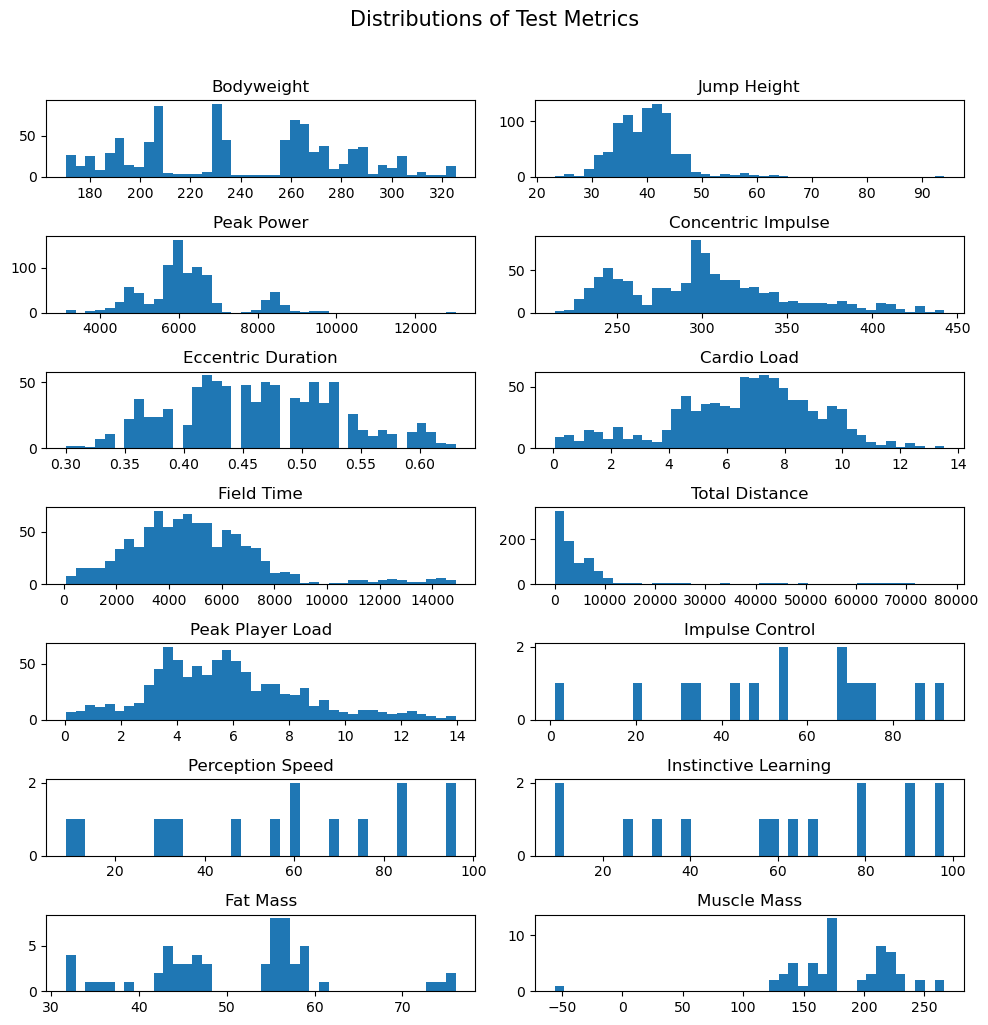

In [14]:
# list with player positions
positions = ["LB", "DL", "DB"]

# subset data to get data belonging to each position
LB_metrics = df[df["Position"] == "LB"]
DL_metrics = df[df["Position"] == "DL"]
DB_metrics = df[df["Position"] == "DB"]

# store column names to visualize
metric_columns = ['Bodyweight', 'Jump_Height',
       'Peak_Power', 'Concentric_Impulse', 'Eccentric_Duration', 'Cardio_Load',
       'FIELD_TIME', 'TOTAL_DISTANCE', 'PEAK_PLAYER_LOAD', 'IMPULSE_CONTROL',
       'PERCEPTION_SPEED', 'INSTINCTIVE_LEARNING', 'FAT_MASS', 'MUSCLE_MASS']
# titles associated with column names for better display on graphs
metric_titles = ['Bodyweight', 'Jump Height',
       'Peak Power', 'Concentric Impulse', 'Eccentric Duration', 'Cardio Load',
       'Field Time', 'Total Distance', 'Peak Player Load', 'Impulse Control',
       'Perception Speed', 'Instinctive Learning', 'Fat Mass', 'Muscle Mass']

# plot distributions of all metrics
fig, ax = plt.subplots(7, 2, figsize=(10, 10))
count = 0
for i in range(0, 7):
    for j in range(0, 2):
        ax[i, j].hist(df[metric_columns[count]], bins =40)
        ax[i, j].set_title(metric_titles[count])
        count += 1
        
plt.suptitle("Distributions of Test Metrics", y = 1.02, fontsize=15)
plt.tight_layout()

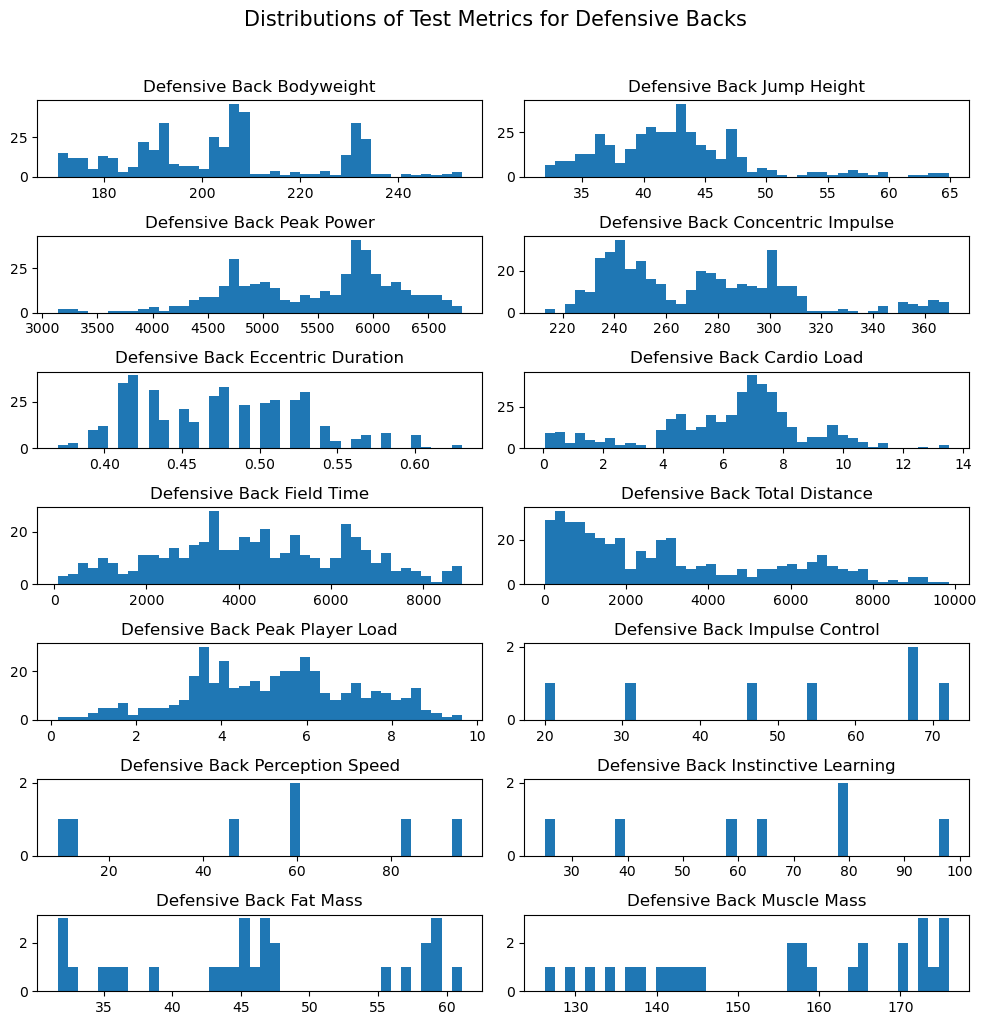

In [15]:
# plot distributions of all metrics for Defensive Backs
fig, ax = plt.subplots(7, 2, figsize=(10, 10))
count = 0
for i in range(0, 7):
    for j in range(0, 2):
        ax[i, j].hist(DB_metrics[metric_columns[count]], bins =40)
        ax[i, j].set_title('Defensive Back ' + metric_titles[count])
        count += 1

plt.suptitle("Distributions of Test Metrics for Defensive Backs", y = 1.02, fontsize=15)
plt.tight_layout()

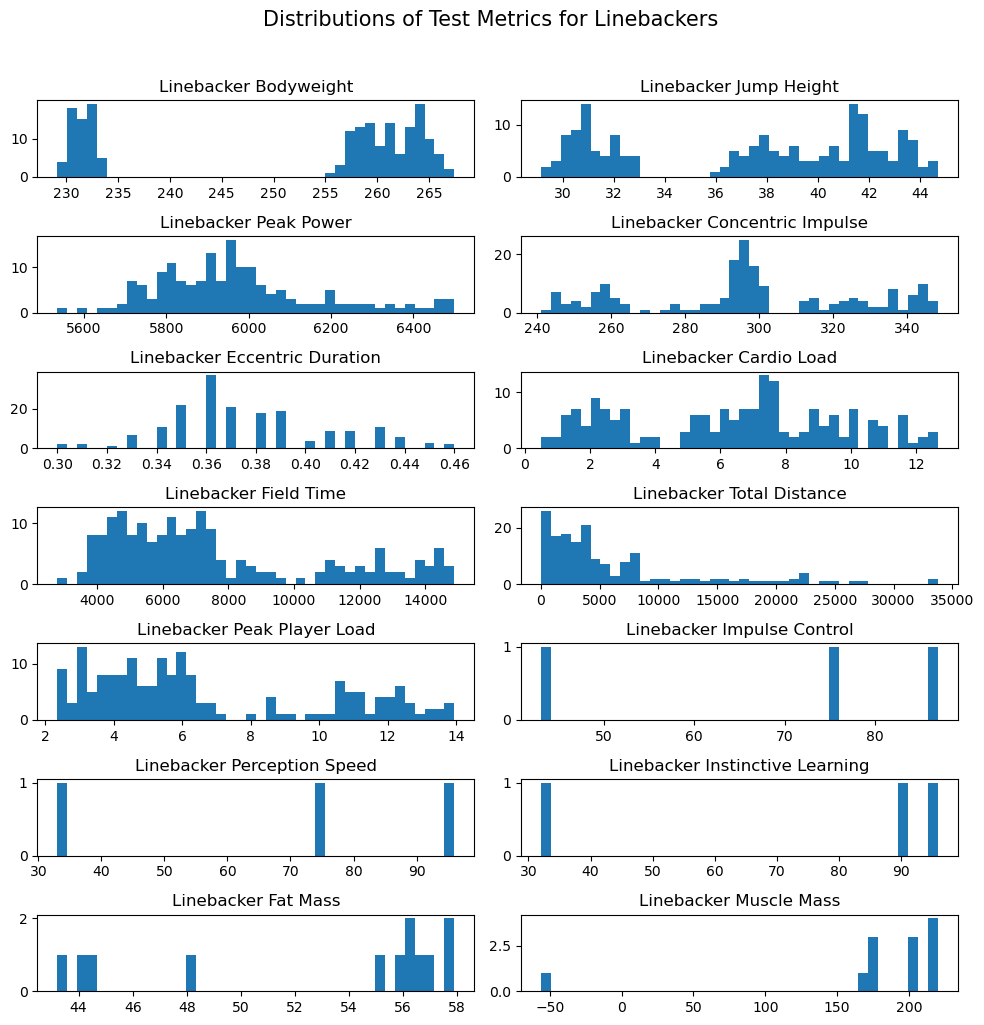

In [16]:
# plot distributions of all metrics for Linebackers
fig, ax = plt.subplots(7, 2, figsize=(10, 10))
count = 0
for i in range(0, 7):
    for j in range(0, 2):
        ax[i, j].hist(LB_metrics[metric_columns[count]], bins =40)
        ax[i, j].set_title('Linebacker ' + metric_titles[count])
        count += 1

plt.suptitle("Distributions of Test Metrics for Linebackers", y = 1.02, fontsize=15)
plt.tight_layout()

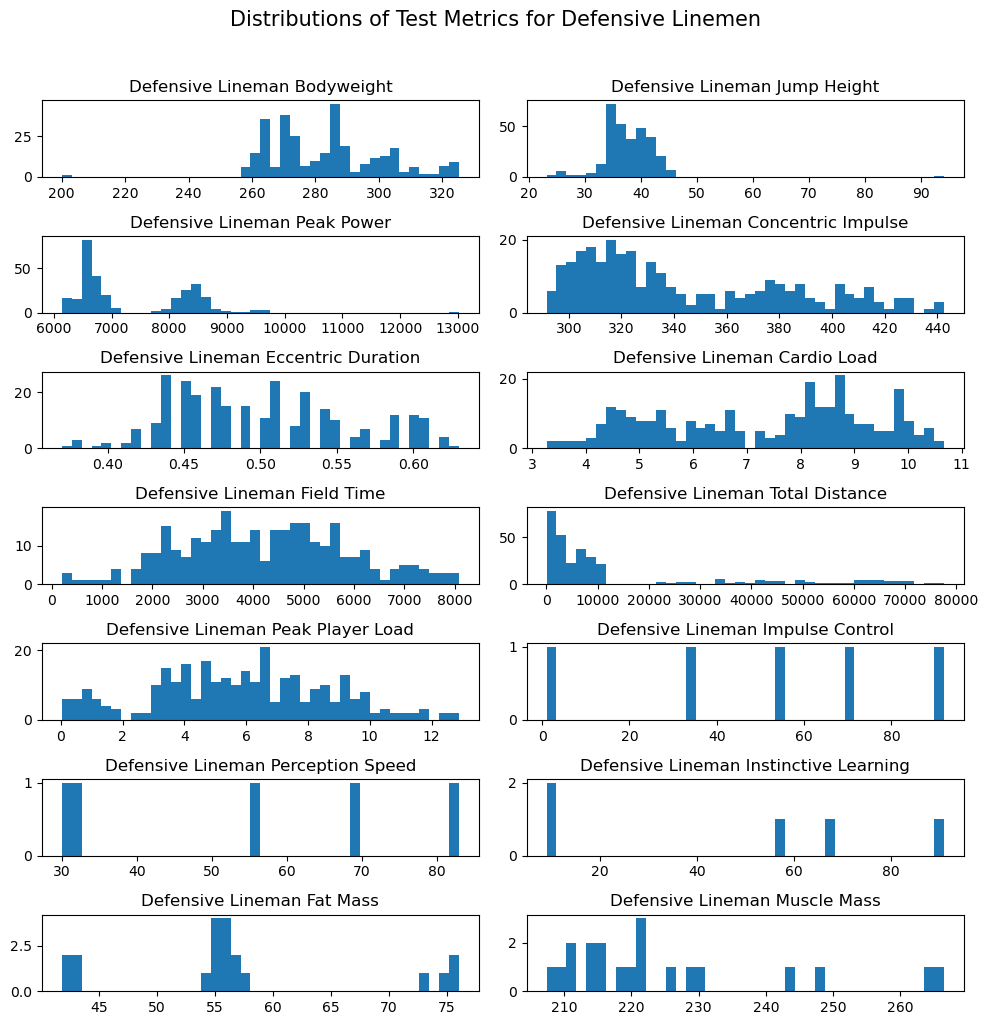

In [17]:
# plot distributions of all metrics for Defensive Linemen
fig, ax = plt.subplots(7, 2, figsize=(10, 10))
count = 0
for i in range(0, 7):
    for j in range(0, 2):
        ax[i, j].hist(DL_metrics[metric_columns[count]], bins =40)
        ax[i, j].set_title('Defensive Lineman ' + metric_titles[count])
        count += 1

plt.suptitle("Distributions of Test Metrics for Defensive Linemen", y = 1.02, fontsize=15)
plt.tight_layout()

##  C. Manage outliers and process data.

In [19]:
from scipy.stats import shapiro, zscore

# dictionaries to store data from each position and results of outlier detection
position_datasets = {'LB':LB_metrics, 'DB':DB_metrics, 'DL':DL_metrics} 
iqr_variables_position = {'LB':[], 'DB':[], 'DL':[]} # for usage of IQR method
small_variables_position = {'LB':[], 'DB':[], 'DL':[]} # for usage of modified Z-score

# append variables to dictionary according to sample size when separated by position
for i in range(0, len(metric_columns)):
    for j in range(0, len(positions)):
        
        # if less than 20 data points exist, append to dictionary to undergo modified Z score
        if position_datasets[positions[j]][metric_columns[i]].notna().sum() <= 20:
            small_variables_position[positions[j]].append(metric_columns[i]) # append for modified Z score
            
        else:
            iqr_variables_position[positions[j]].append(metric_columns[i]) # append for IQR method

In [20]:
# function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = pd.DataFrame(index=df.index, columns=df.columns)

    for col in df.columns:
        # calculate Q1, Q3, and IQR for the current column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # define outlier range for the column
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        
        # identify outliers
        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
    return outliers

# function to detect outliers for small sample sizes
def detect_outliers_small(df):

    outliers = pd.DataFrame(index=df.index, columns=df.columns)

    for col in df.columns:
        # calculate median and MAD for the current column
        median = np.nanmedian(df[col])  # Median for the column
        mad = np.nanmedian(np.abs(df[col] - median))  # MAD for the column
        
        # avoid division by zero if MAD is 0
        if mad == 0:
            mad = np.nan  # set to NaN to prevent division by zero
        
        # compute the modified Z-scores
        modified_z_scores = 0.6745 * (df[col] - median) / mad
        
        # identify outliers with high threshold (8)
        outliers[col] = np.abs(modified_z_scores) > 8
    
    return outliers

# set outliers missing
for j in range(0, len(positions)):
    
    pos_data = position_datasets[positions[j]]
    
    # determine outliers via IQR
    iqr_outliers = detect_outliers_iqr(pos_data[iqr_variables_position[positions[j]]]
                                     ).add_prefix("outlier_")
    
    # determine outliers via modified Z score
    small_outliers = detect_outliers_small(pos_data[small_variables_position[positions[j]]]
                                     ).add_prefix("outlier_")

    # concatenate main dataframe and outlier data together
    outlier_df = pd.concat([iqr_outliers, small_outliers], axis=1)
    position_datasets[positions[j]] = pd.concat([pos_data, iqr_outliers, small_outliers], axis=1)

    # if value is an outlier, set to missing
    for out_col in outlier_df.columns:
        original_col = out_col.replace('outlier_', '')  # replace 
        position_datasets[positions[j]].loc[position_datasets[positions[j]][out_col] == True, original_col] = np.nan  
    
    position_datasets[positions[j]] = position_datasets[positions[j]].drop(columns=outlier_df.columns)

# stack datasets across positions, now without outliers, together
final_df = pd.concat([position_datasets["LB"], position_datasets["DB"], position_datasets["DL"]], axis=0)

display(final_df.head())

,Position,Person_ID,Date,Bodyweight,Jump_Height,Peak_Power,Concentric_Impulse,Eccentric_Duration,Cardio_Load,FIELD_TIME,TOTAL_DISTANCE,PEAK_PLAYER_LOAD,IMPULSE_CONTROL,PERCEPTION_SPEED,INSTINCTIVE_LEARNING,FAT_MASS,MUSCLE_MASS
0,LB,1,2024-01-03,258.42,32.06,NaN,315.53,0.44,5.52,7290.47,NaN,6.16,NaN,NaN,NaN,NaN,NaN
1,LB,1,2024-01-11,258.71,32.77,NaN,319.44,0.43,5.33,NaN,1954.07,5.25,NaN,NaN,NaN,NaN,NaN
2,LB,1,2024-01-15,257.96,32.65,NaN,NaN,0.43,6.21,7470.83,1856.11,5.25,87.0,75.0,32.0,56.68,201.28
3,LB,1,2024-01-20,257.39,NaN,NaN,315.19,0.41,6.00,NaN,2001.20,4.54,NaN,NaN,NaN,NaN,NaN
4,LB,1,2024-01-23,257.71,32.18,NaN,311.35,0.42,6.50,7309.05,2451.89,NaN,NaN,NaN,NaN,NaN,NaN


(array([18., 17., 22., 25., 18., 15., 21., 20., 18., 21.]),
 array([ 50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 10 artists>)

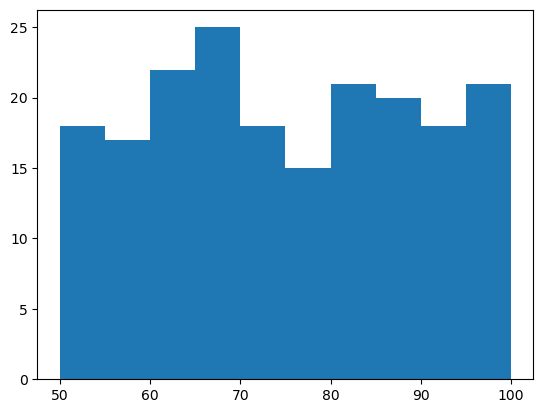

In [21]:
# detect outliers for PFF_Tackling_Grade - no outliers exist by manual inspection
plt.hist(pff["PFF_Tackling_Grade"])

In [22]:
# create dataset that will be used for analysis, containing test and PFF data

# sort dataset in preparation for forward fill
df_sorted = final_df.sort_values(by=['Person_ID', 'Date'])

# forward fill metrics when metric is missing, per person
df_sorted[metric_columns] = df_sorted.groupby("Person_ID")[metric_columns].ffill()

# sort datasets in preparation to merge
df_sorted = df_sorted.sort_values(by=['Date'])
pff_sorted = pff.sort_values(by=['Date'])

# for each person, merge metrics dataset into PFF dataset on closest date (left join by default)
pff_w_metrics = pd.merge_asof(pff_sorted, df_sorted, on='Date', by='Person_ID', direction='nearest').sort_values(by=['Person_ID', 'Date'])

display(pff_w_metrics) 

,Date,Person_ID,PFF_Tackling_Grade,Position,Bodyweight,Jump_Height,Peak_Power,Concentric_Impulse,Eccentric_Duration,Cardio_Load,FIELD_TIME,TOTAL_DISTANCE,PEAK_PLAYER_LOAD,IMPULSE_CONTROL,PERCEPTION_SPEED,INSTINCTIVE_LEARNING,FAT_MASS,MUSCLE_MASS
0,2024-08-31,1,75,LB,259.25,30.59,5981.37,336.79,0.37,5.49,5533.06,5297.62,2.96,87.0,75.0,32.0,55.98,205.35
27,2024-09-07,1,68,LB,260.17,30.99,6028.66,336.79,0.37,5.13,6365.65,5348.81,3.35,87.0,75.0,32.0,55.98,205.35
33,2024-09-14,1,61,LB,260.17,30.81,5957.87,336.06,0.36,5.13,6365.65,4904.74,3.95,87.0,75.0,32.0,55.98,205.35
53,2024-09-21,1,64,LB,260.17,30.57,5916.89,335.03,0.36,5.19,6365.65,4904.74,3.93,87.0,75.0,32.0,56.13,205.35
61,2024-09-28,1,62,LB,260.94,29.80,5904.17,337.18,0.36,5.20,7031.86,5379.68,3.98,87.0,75.0,32.0,56.13,205.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2024-11-09,15,90,DB,232.43,47.17,5837.08,308.76,0.45,11.22,76.16,656.15,6.31,67.0,9.0,39.0,59.23,173.35
140,2024-11-16,15,85,DB,231.52,47.11,5837.08,311.81,0.45,11.22,963.65,1269.96,6.19,67.0,9.0,39.0,59.23,173.35
157,2024-11-23,15,92,DB,231.27,47.61,5864.96,313.34,0.44,11.42,478.16,1410.32,5.52,67.0,9.0,39.0,59.23,173.35
178,2024-11-30,15,62,DB,230.92,47.42,5976.37,312.19,0.44,10.82,1216.73,1806.81,6.41,67.0,9.0,39.0,59.23,173.35


## D. Summarize key descriptive statistics and any preliminary relationships with PFF grades.

In [24]:
import scipy.stats as stats

# test if significant difference exists between metrics amongst groups 
DB_pff = pff_w_metrics[pff_w_metrics["Position"] == "DB"]
DL_pff = pff_w_metrics[pff_w_metrics["Position"] == "DL"]
LB_pff = pff_w_metrics[pff_w_metrics["Position"] == "LB"]

# add PFF tackling grade into metrics
metric_columns.append("PFF_Tackling_Grade")

# test whether metrics are significantly different across positions
for m in metric_columns:
    f_stat, p_val = stats.f_oneway(DB_pff[m], DL_pff[m], LB_pff[m]) # anova

    # if p value is less than 0.05, difference is significant (not due to change)
    if p_val < 0.05:
        print("Column " + m + ": YES - Significant difference exists between the groups.")
    else:
        print("Column " + m + ": NO - No significant difference between the groups.")
  

Column Bodyweight: YES - Significant difference exists between the groups.
Column Jump_Height: YES - Significant difference exists between the groups.
Column Peak_Power: YES - Significant difference exists between the groups.
Column Concentric_Impulse: YES - Significant difference exists between the groups.
Column Eccentric_Duration: YES - Significant difference exists between the groups.
Column Cardio_Load: NO - No significant difference between the groups.
Column FIELD_TIME: YES - Significant difference exists between the groups.
Column TOTAL_DISTANCE: YES - Significant difference exists between the groups.
Column PEAK_PLAYER_LOAD: NO - No significant difference between the groups.
Column IMPULSE_CONTROL: YES - Significant difference exists between the groups.
Column PERCEPTION_SPEED: YES - Significant difference exists between the groups.
Column INSTINCTIVE_LEARNING: YES - Significant difference exists between the groups.
Column FAT_MASS: NO - No significant difference between the g

In [25]:
# mean, min and max of each metric column
print("Statistics for Metrics")
display(pff_w_metrics[metric_columns].describe().round(2).loc[["mean", "min", "max"]])
print("\n")

# median by position
print("Median of Metrics, By Position")
pff_w_metrics.groupby("Position")[metric_columns].median().round(2)

Statistics for Metrics


,Bodyweight,Jump_Height,Peak_Power,Concentric_Impulse,Eccentric_Duration,Cardio_Load,FIELD_TIME,TOTAL_DISTANCE,PEAK_PLAYER_LOAD,IMPULSE_CONTROL,PERCEPTION_SPEED,INSTINCTIVE_LEARNING,FAT_MASS,MUSCLE_MASS,PFF_Tackling_Grade
mean,240.79,40.24,6247.28,303.95,0.47,6.73,4795.01,5998.17,5.86,54.47,56.07,59.67,49.45,189.33,74.51
min,171.62,25.01,3239.71,225.57,0.30,0.47,76.16,14.43,0.08,1.00,9.00,9.00,31.80,126.20,50.00
max,305.73,62.78,9644.93,442.43,0.63,13.29,14881.71,33054.13,13.69,92.00,96.00,98.00,59.27,247.86,100.00




Median of Metrics, By Position


,Bodyweight,Jump_Height,Peak_Power,Concentric_Impulse,Eccentric_Duration,Cardio_Load,FIELD_TIME,TOTAL_DISTANCE,PEAK_PLAYER_LOAD,IMPULSE_CONTROL,PERCEPTION_SPEED,INSTINCTIVE_LEARNING,FAT_MASS,MUSCLE_MASS,PFF_Tackling_Grade
Position,,,,,,,,,,,,,,,
DB,207.15,40.41,5689.60,281.93,0.49,7.14,3996.96,2777.37,5.64,55.0,60.0,64.0,46.68,165.63,72.0
DL,287.06,39.40,6947.64,316.73,0.50,7.79,3858.23,6046.25,5.76,55.0,56.0,57.0,55.15,219.25,72.0
LB,258.35,38.02,6032.17,296.41,0.36,6.00,6712.92,3236.71,4.24,75.0,75.0,91.0,55.98,205.35,80.0


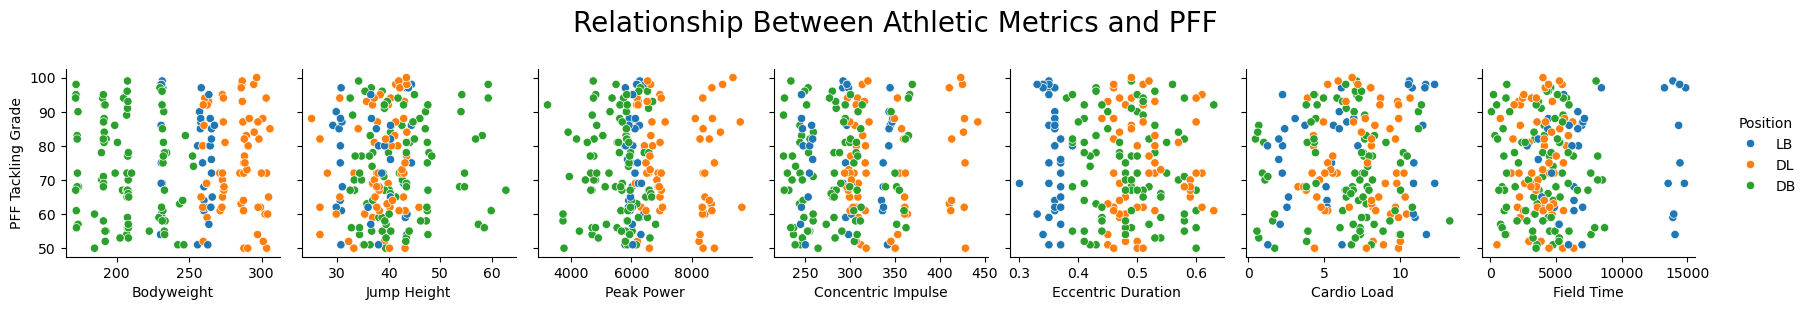

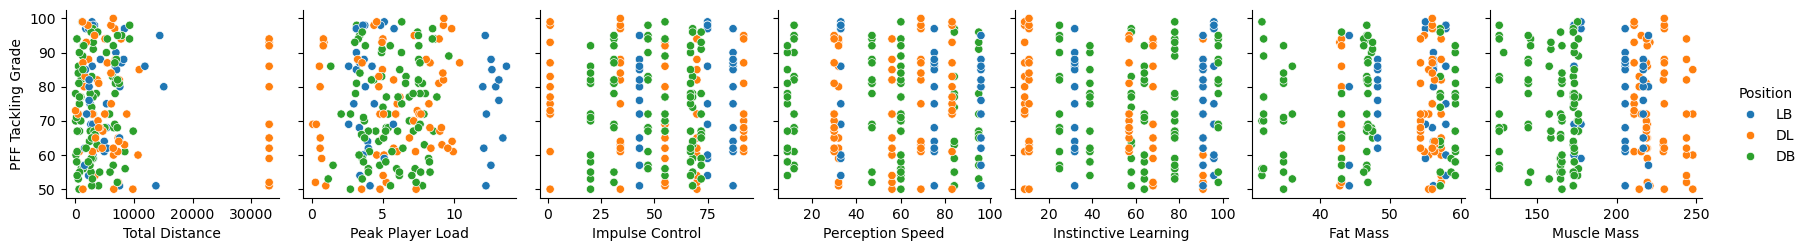

In [26]:
import seaborn as sns

# remove PFF grade from metric columns for usage next
metric_columns.remove("PFF_Tackling_Grade")

# plot all athletic metrics against PFF grades - immediately see no linear relationships
# plot first 7 metrics in one row
pairplot = sns.pairplot(pff_w_metrics, y_vars=['PFF_Tackling_Grade'], hue="Position", x_vars=metric_columns[:7])
plt.suptitle("Relationship Between Athletic Metrics and PFF", fontsize=20, y=1.2)

# set custom axis titles
n_plot = 0
for ax in pairplot.axes.flatten():
    ax.set_xlabel(metric_titles[n_plot])
    ax.set_ylabel('PFF Tackling Grade')
    n_plot += 1
    
plt.show()

# plot remaining metrics in another row
pairplot = sns.pairplot(pff_w_metrics, y_vars=['PFF_Tackling_Grade'], hue="Position", x_vars=metric_columns[7:])

# set custom axis titles
for ax in pairplot.axes.flatten():
    ax.set_xlabel(metric_titles[n_plot])
    ax.set_ylabel('PFF Tackling Grade')
    n_plot += 1
plt.show()

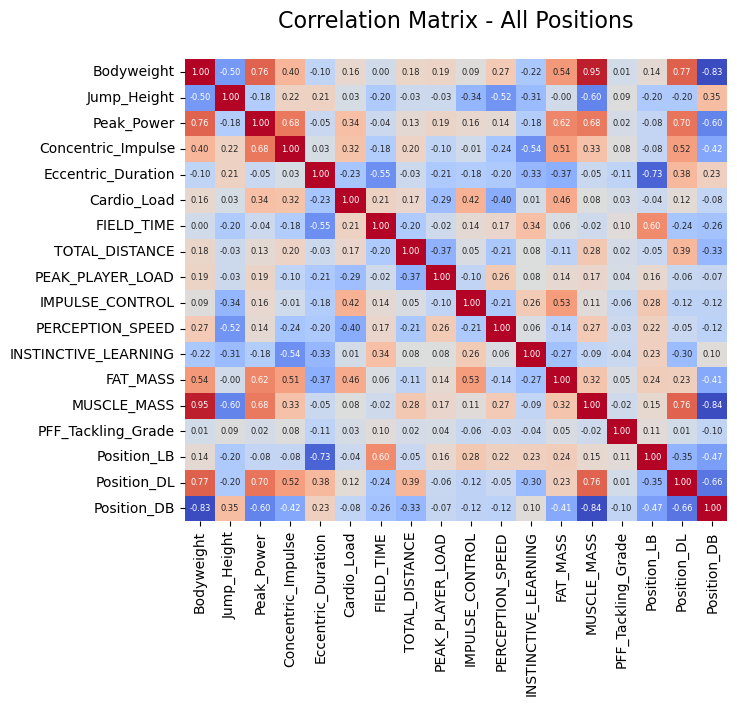

<Figure size 3000x600 with 0 Axes>

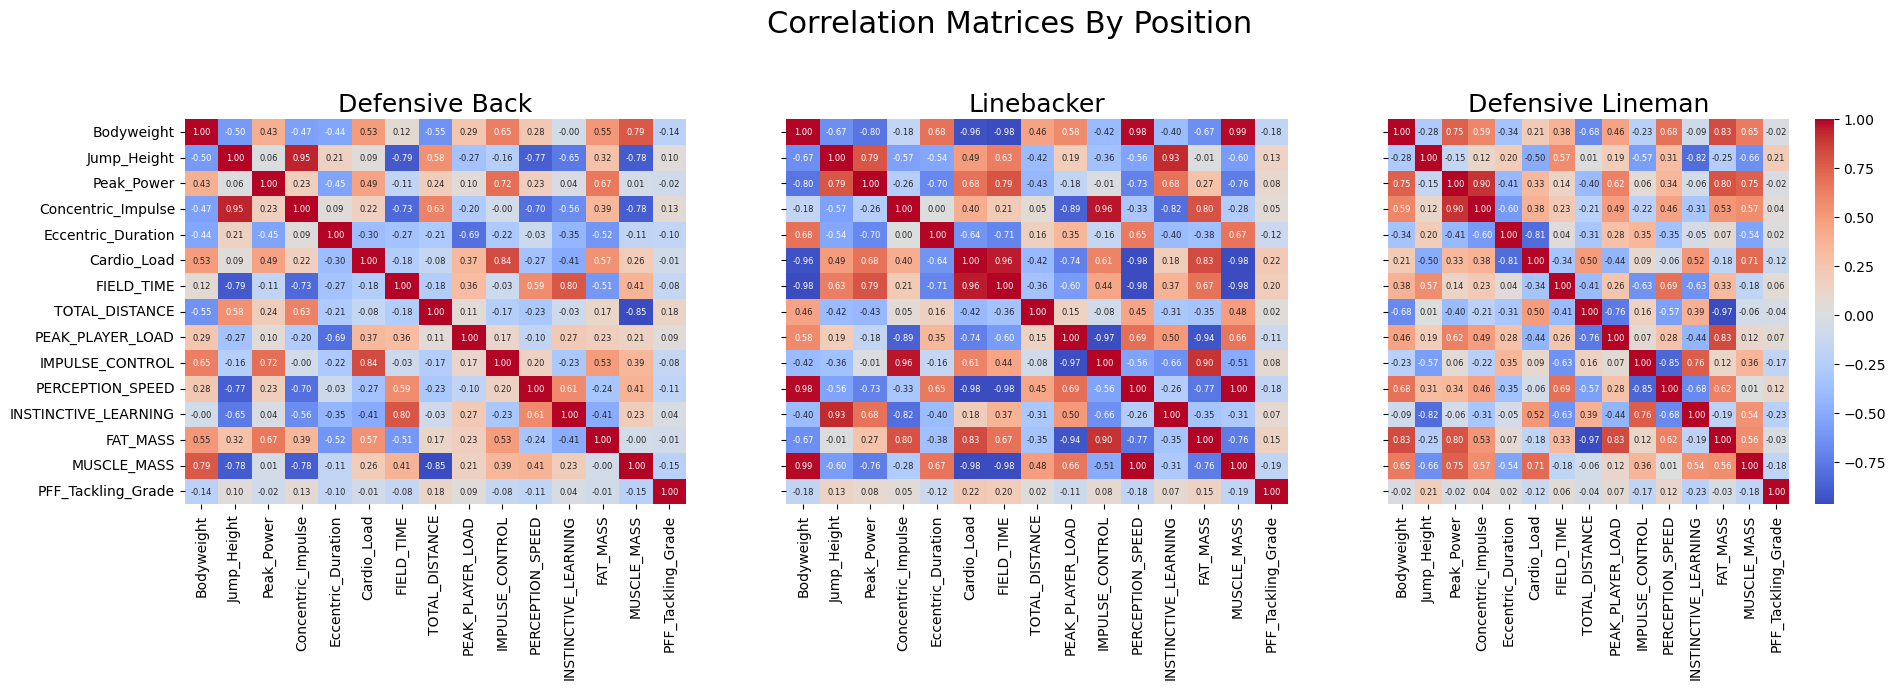

In [27]:
import copy

# 1-hot encode Position column
ohot_pff_w_metrics = pd.get_dummies(pff_w_metrics, columns=["Position"], drop_first=False)

# create list to subset variables for usage in correlation matrix for all positions
corr_columns = copy.deepcopy(metric_columns)
corr_columns.extend(["PFF_Tackling_Grade", "Position_LB", "Position_DL", "Position_DB"])

# correlation matrix for all positions
plt.figure(figsize=(7, 6))
correlation_matrix = ohot_pff_w_metrics[corr_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 6}, cbar=False)
plt.title("Correlation Matrix - All Positions", fontsize=16, y=1.05)
plt.show()

# create subplots to put position-correlation matrices side-by-side
plt.figure(figsize=(30, 6))
fig, ax = plt.subplots(1, 3, figsize=(22, 5), sharey=True)

# append PFF grades to metric columns (again) for use in position-specific correlation matrices
metric_columns.append("PFF_Tackling_Grade")

# correlation matrix for Defensive Back
correlation_matrix = DB_pff[metric_columns].corr()
sns.heatmap(correlation_matrix, ax=ax[0], annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 6}, cbar=False)
ax[0].set_title("Defensive Back", fontsize=18)

# correlation matrix for Linebacker
correlation_matrix = LB_pff[metric_columns].corr()
sns.heatmap(correlation_matrix, ax=ax[1], annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 6}, cbar=False)
ax[1].set_title("Linebacker", fontsize=18)

# correlation matrix for Defensive Lineman
correlation_matrix = DL_pff[metric_columns].corr()
sns.heatmap(correlation_matrix, ax=ax[2], annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 6})
ax[2].set_title("Defensive Lineman", fontsize=18)

plt.suptitle("Correlation Matrices By Position", fontsize=22, y=1.1)
plt.show()

<Axes: xlabel='Person_ID', ylabel='PFF_Tackling_Grade'>

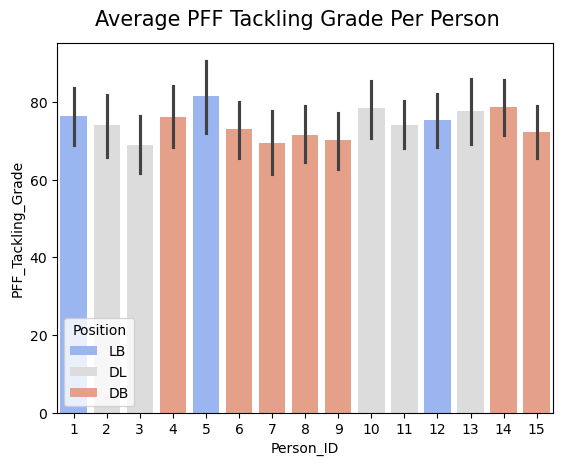

In [28]:
# display average PFF grade per person
plt.suptitle("Average PFF Tackling Grade Per Person", fontsize=15, y=0.95)
sns.barplot(data = pff_w_metrics, y = "PFF_Tackling_Grade", x="Person_ID", estimator=np.mean, hue="Position", palette="coolwarm")

In [29]:
pff_w_range = copy.deepcopy(pff_w_metrics)

# get quantiles of PFF
display(pff_w_range["PFF_Tackling_Grade"].describe())

# create column PFF_Range that groups PFF grades into High (>75% percentile), Medium (>25% and <75%), and Low (<25%)
pff_w_range["PFF_Range"] = np.where(pff_w_metrics["PFF_Tackling_Grade"] >= 87, "High",
                                      np.where((pff_w_metrics["PFF_Tackling_Grade"]< 87) & (pff_w_metrics["PFF_Tackling_Grade"]>72), "Medium", "Low"))

# display mean statistics per metric for each PFF grade group
display(pff_w_range.groupby(["PFF_Range", "Position"])[metric_columns].median().round(2).loc[["High", "Medium", "Low"]])

count    195.000000
mean      74.512821
std       14.475489
min       50.000000
25%       62.000000
50%       72.000000
75%       87.000000
max      100.000000
Name: PFF_Tackling_Grade, dtype: float64

Bodyweight  Jump_Height  Peak_Power  Concentric_Impulse  \
PFF_Range Position                                                            
High      DB            198.34        42.35     5665.94              288.58   
          DL            286.45        40.87     6965.61              317.76   
          LB            244.50        39.94     6156.00              296.68   
Medium    DB            207.76        43.44     5718.64              285.02   
          DL            288.49        41.17     6700.63              316.73   
          LB            261.61        38.61     5906.12              276.47   
Low       DB            207.39        40.11     5689.60              278.73   
          DL            285.41        37.81     6967.50              314.26   
          LB            260.17        38.02     6032.17              298.16   

                    Eccentric_Duration  Cardio_Load  FIELD_TIME  \
PFF_Range Position                                                
High      DB                      0.49         6.72     4360.65   
          DL                      0.50         7.09     3779.10   
          LB                      0.35         8.76    10859.93   
Medium    DB                      0.47         7.65     4043.60   
          DL                      0.50         7.46     4466.05   
          LB                      0.36         4.62     6108.00   
Low       DB                      0.49         7.06     3996.96   
          DL                      0.50         8.18     3602.42   
          LB                      0.36         5.19     6365.65   

                    TOTAL_DISTANCE  PEAK_PLAYER_LOAD  IMPULSE_CONTROL  \
PFF_Range Position                                                      
High      DB               3411.56              6.32             51.0   
          DL               5743.11              4.97             44.5   
          LB               3742.30              3.70             75.0   
Medium    DB               2636.90              6.26             55.0   
          DL               3964.37              6.01             34.0   
          LB               4074.37              8.22             59.0   
Low       DB               2669.61              5.38             55.0   
          DL               6467.37              5.83             70.0   
          LB               3055.97              4.10             75.0   

                    PERCEPTION_SPEED  INSTINCTIVE_LEARNING  FAT_MASS  \
PFF_Range Position                                                     
High      DB                    47.0                  78.0     46.76   
          DL                    62.5                  34.0     55.40   
          LB                    54.0                  93.5     56.13   
Medium    DB                    53.5                  61.0     46.84   
          DL                    69.0                  11.0     55.72   
          LB                    85.5                  91.0     52.10   
Low       DB                    60.0                  64.0     46.68   
          DL                    56.0                  57.0     54.83   
          LB                    75.0                  91.0     55.98   

                    MUSCLE_MASS  PFF_Tackling_Grade  
PFF_Range Position                                   
High      DB             158.70                93.5  
          DL             219.25                93.5  
          LB             191.48                97.0  
Medium    DB             169.19                81.0  
          DL             219.25                81.0  
          LB             211.04                81.0  
Low       DB             165.63                61.0  
          DL             219.25                62.5  
          LB             205.35                62.0

In [30]:
# divide data into high, medium and low PFF grades
High_pff = pff_w_range[pff_w_range["PFF_Range"] == "High"]
Med_pff = pff_w_range[pff_w_range["PFF_Range"] == "Medium"]
Low_pff = pff_w_range[pff_w_range["PFF_Range"] == "Low"]

# test whether metrics are significantly different between PFF ranges and positions
# only significant differences are PFF grades across High/Med/Low PFF ranges, which only restates the obvious
for m in metric_columns:
    for i in range(0, len(positions)):
        f_stat, p_val = stats.f_oneway(High_pff[High_pff["Position"]==positions[i]][m], 
                                       Med_pff[Med_pff["Position"]==positions[i]][m], 
                                       Low_pff[Low_pff["Position"]==positions[i]][m])
    
        if p_val < 0.05:
            print("For " + positions[i] + ", Column " + m + ": YES - Significant difference exists between the groups.")
        else:
            print("For " + positions[i] + ", Column " + m + ": NO - No significant difference between the groups.")


For LB, Column Bodyweight: NO - No significant difference between the groups.
For DL, Column Bodyweight: NO - No significant difference between the groups.
For DB, Column Bodyweight: NO - No significant difference between the groups.
For LB, Column Jump_Height: NO - No significant difference between the groups.
For DL, Column Jump_Height: NO - No significant difference between the groups.
For DB, Column Jump_Height: NO - No significant difference between the groups.
For LB, Column Peak_Power: NO - No significant difference between the groups.
For DL, Column Peak_Power: NO - No significant difference between the groups.
For DB, Column Peak_Power: NO - No significant difference between the groups.
For LB, Column Concentric_Impulse: NO - No significant difference between the groups.
For DL, Column Concentric_Impulse: NO - No significant difference between the groups.
For DB, Column Concentric_Impulse: NO - No significant difference between the groups.
For LB, Column Eccentric_Duration: NO

# 2. Develop Analytical Framework

In [32]:
# drop rows with missing metrics for modeling preparation
model_data = pff_w_metrics.dropna()

## A. Modeling Separated By Position

In [34]:
# separate predictor datasets by position
X_DB = model_data[model_data["Position"] == "DB"].drop(columns = ["Date", "Person_ID", "PFF_Tackling_Grade", "Position"])
X_DL = model_data[model_data["Position"] == "DL"].drop(columns = ["Date", "Person_ID", "PFF_Tackling_Grade", "Position"])
X_LB = model_data[model_data["Position"] == "LB"].drop(columns = ["Date", "Person_ID", "PFF_Tackling_Grade", "Position"])

# separate target datasets by position
y_DB = model_data[model_data["Position"] == "DB"]["PFF_Tackling_Grade"]
y_DL = model_data[model_data["Position"] == "DL"]["PFF_Tackling_Grade"]
y_LB = model_data[model_data["Position"] == "LB"]["PFF_Tackling_Grade"]

# put predictor and target datasets into dictionaries
X_datasets = {"DB": X_DB, "DL": X_DL, "LB":X_LB}
y_datasets = {"DB": y_DB, "DL": y_DL, "LB":y_LB}

### Linear Regression

In [36]:
# linear regression model
from sklearn.linear_model import LassoCV, LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

# create separate model for each position
for i in range(0, len(positions)):

    # initialize model
    model = LinearRegression()

    # initialize scaler
    scaler = StandardScaler()

    # apply Scaler to predictors and target variables
    X = scaler.fit_transform(X_datasets[positions[i]])
    y = y_datasets[positions[i]].reset_index(drop=True) 
    X = pd.DataFrame(X, columns = X_datasets[positions[i]].columns)
    
    # select 6 features via forward selection and insert into model
    sfs = SequentialFeatureSelector(model, n_features_to_select= 6, direction='forward')
    sfs.fit(X, y)
    
    # get names of features
    sfs_mask = sfs.get_support()
    sfs_names = X.columns[sfs_mask].tolist()
    
    # fit linear model with selected features
    lm_model = sm.OLS(y, X[sfs_names]).fit()  

    # perform 5-fold cross validations to test model accuracy
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    average_r2 = -np.mean(cv_scores)
    
    # print model summary
    print("\n-------------")
    print("Position: " + positions[i])
    print("\nFeatures selected: " + str(sfs_names))
    print("\nCross Validation R2 Mean Score: " + str(average_r2) + "\n")
    print(lm_model.summary()) 
    


-------------
Position: LB

Features selected: ['Jump_Height', 'Peak_Power', 'Eccentric_Duration', 'TOTAL_DISTANCE', 'INSTINCTIVE_LEARNING', 'FAT_MASS']

Cross Validation R2 Mean Score: 1980.1789540749578

                                 OLS Regression Results                                
Dep. Variable:     PFF_Tackling_Grade   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.177
Method:                 Least Squares   F-statistic:                            0.02264
Date:                Mon, 10 Feb 2025   Prob (F-statistic):                        1.00
Time:                        14:35:11   Log-Likelihood:                         -225.72
No. Observations:                  39   AIC:                                      463.4
Df Residuals:                      33   BIC:                                      473.4
Df Model:                           6                                                  
C

### XGBoost


------LB------



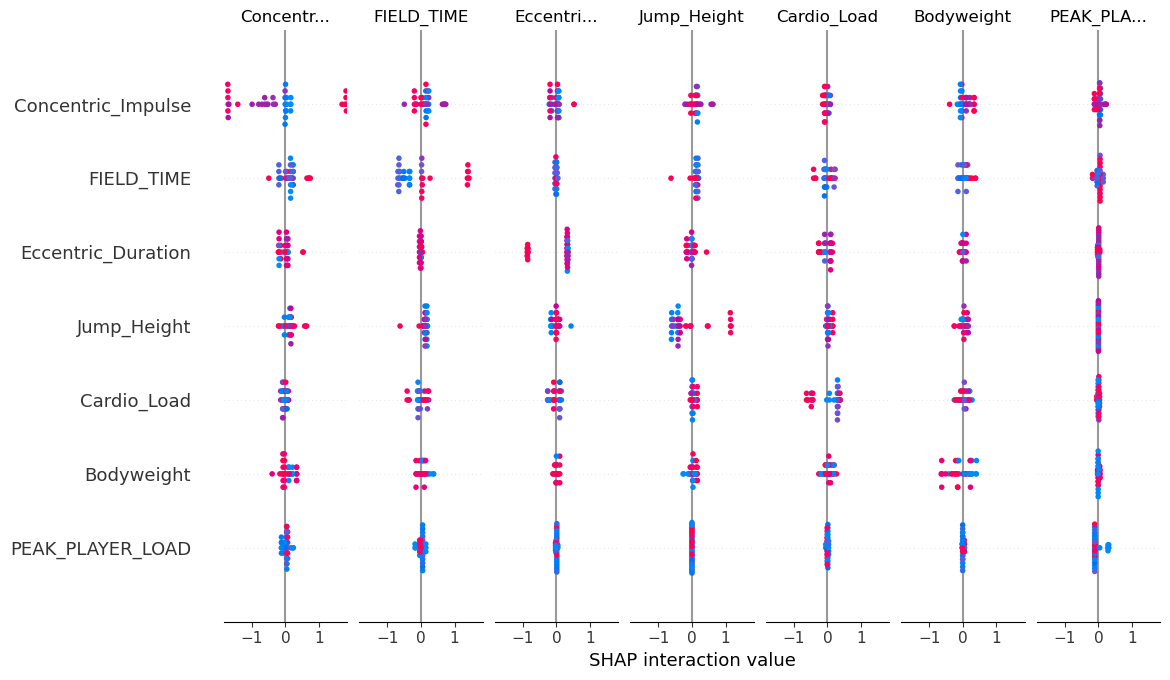

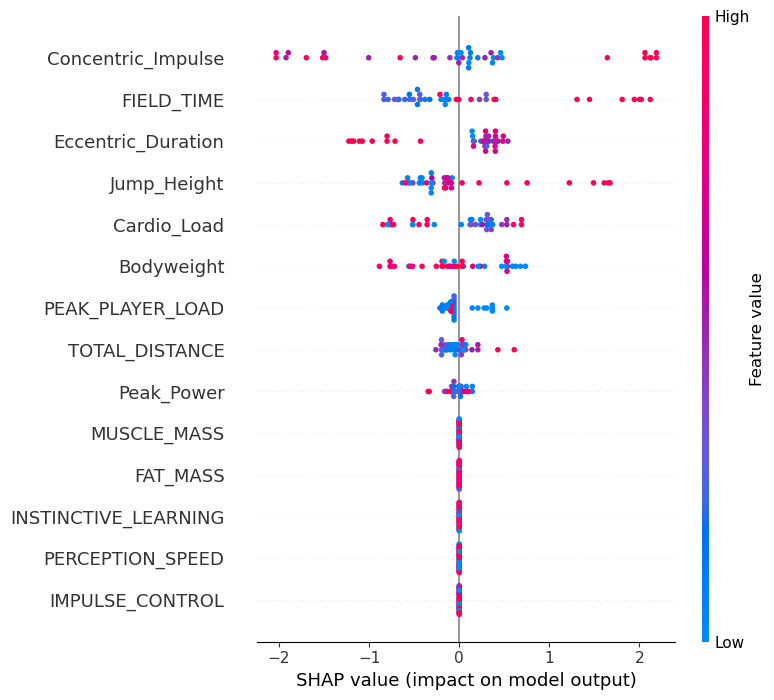

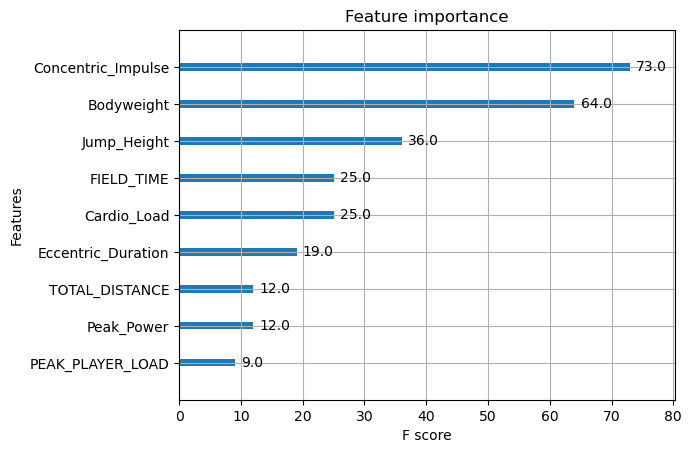

Average Cross-validation Mean-Squared Error: 377.8976822309499
Best XGBoost Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}

------DL------



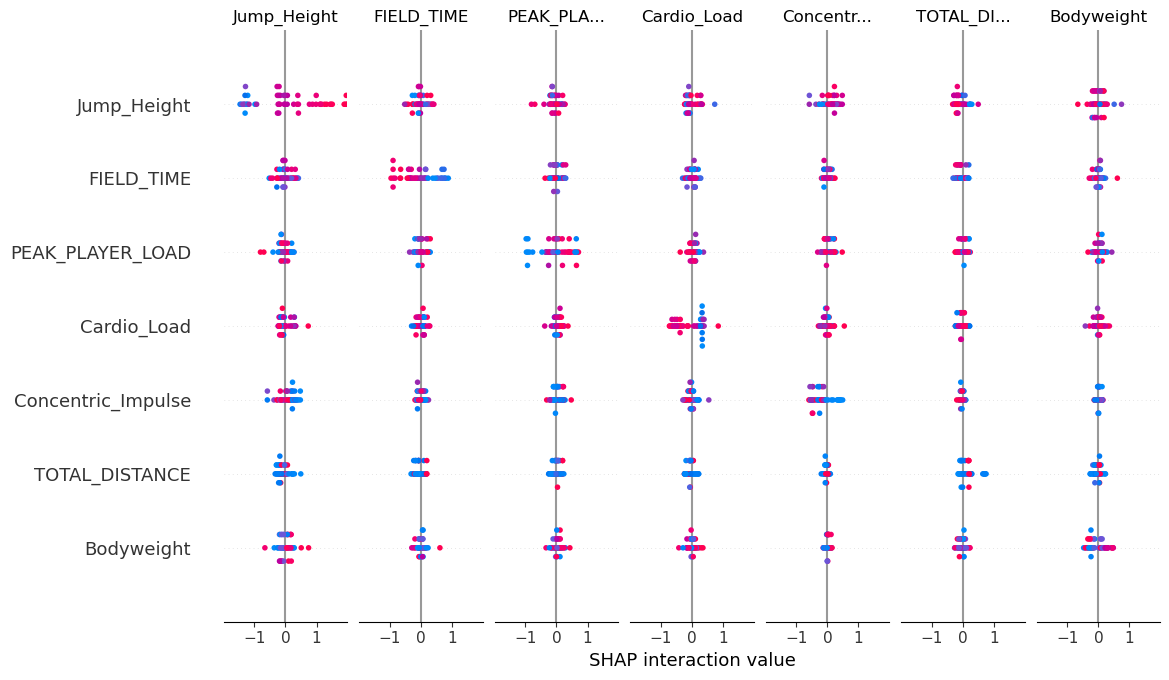

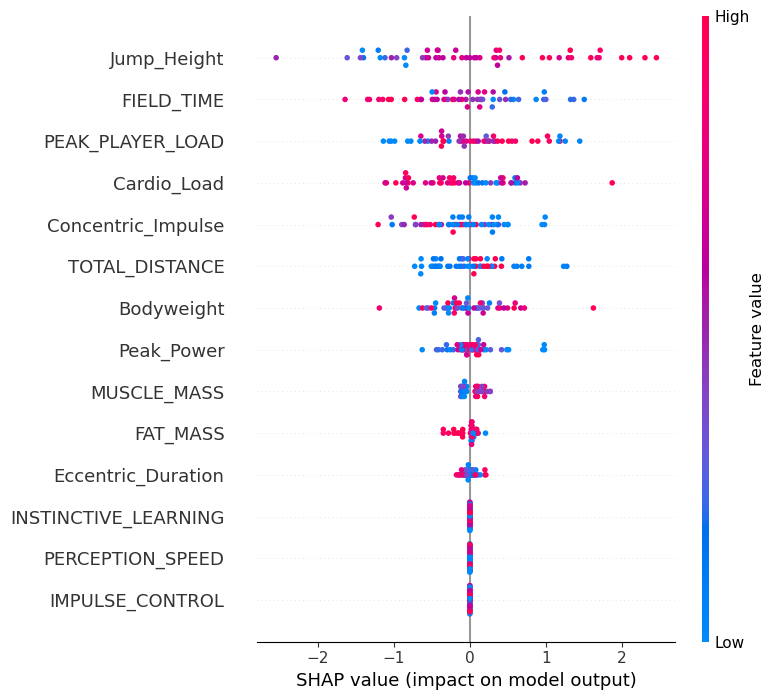

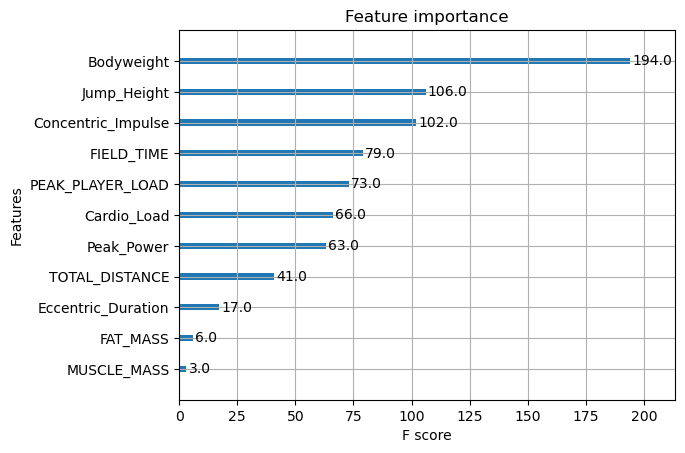

Average Cross-validation Mean-Squared Error: 278.62032751850904
Best XGBoost Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.7}

------DB------



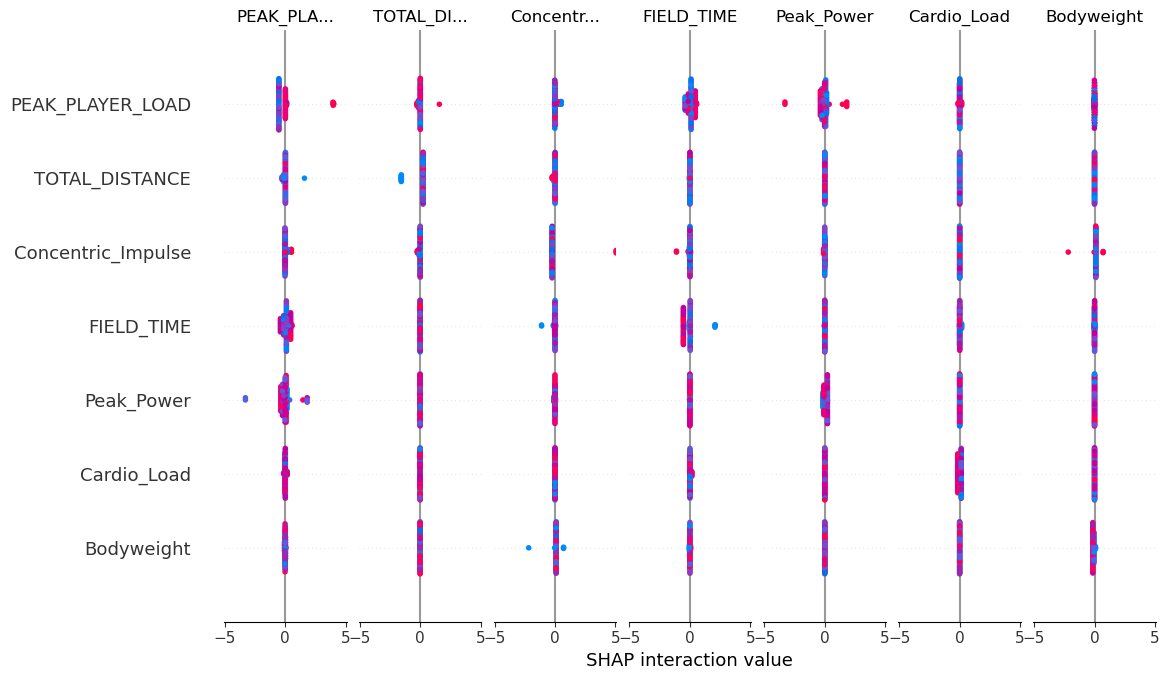

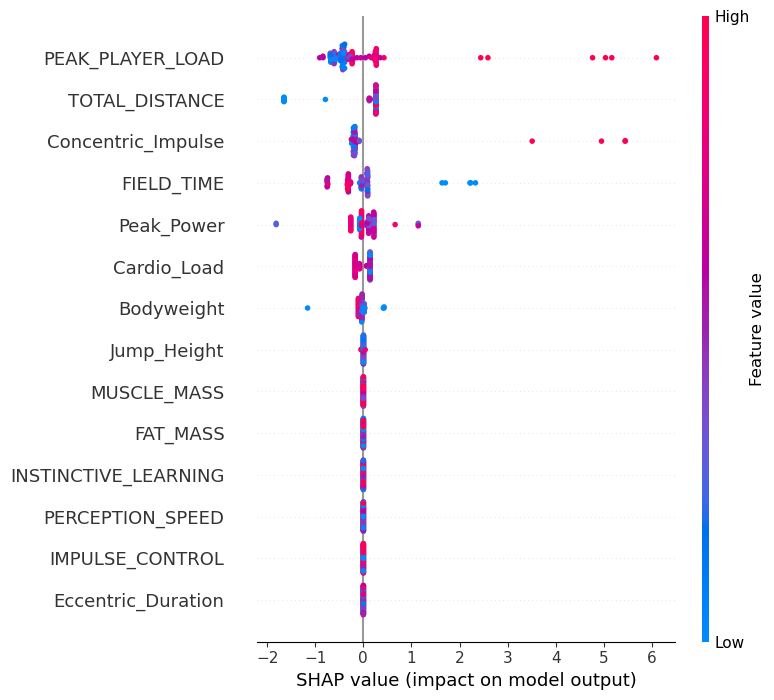

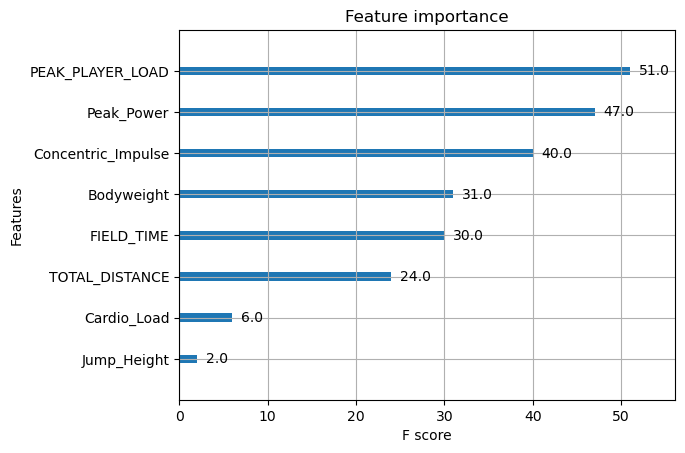

Average Cross-validation Mean-Squared Error: 262.58602292746843
Best XGBoost Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [38]:
# XGBoost

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import shap

for i in range(0, len(positions)):
    
    # define predictors and target variables
    X = X_datasets[positions[i]] # predictor
    y = y_datasets[positions[i]] # target
    
    # model without hyperparameters
    model = xgb.XGBRegressor(objective='reg:squarederror')
    
    # hyperparameters to try out
    param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0]}    
    
    # cross validation on each combo of hyperparameters
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)    
    
    # save best-performing parameters
    best_params = grid_search.best_params_
    
    # put best-performing parameters into XG Boost model
    best_xg_model = xgb.XGBRegressor(max_depth=best_params['max_depth'],
                                    learning_rate=best_params['learning_rate'],
                                    n_estimators=best_params['n_estimators'],
                                    subsample=best_params['subsample'])
    
    # cross-validation on model
    cv_results = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

    # fit XGBoost model with data
    best_xg_model.fit(X, y)
    
    # get SHAP interaction values - how much feature contributes to prediction    
    explainer = shap.TreeExplainer(best_xg_model)
    shap_interactions = explainer.shap_interaction_values(X)

    print("\n------" + positions[i] + "------\n")
    # plot SHAP interactions
    plt_shap = shap.summary_plot(shap_interactions, X) # wider spread = more impact on predictions
    shap_values = explainer(X)

    # Summary plot to see global feature influence
    shap.summary_plot(shap_values, X)
    plt.show() 

    # plot important features
    plt_feat = xgb.plot_importance(best_xg_model)
    plt.show()   

    # average MSE after cross-validation
    print("Average Cross-validation Mean-Squared Error:", -cv_results.mean())    
    # best hyperparameters
    print("Best XGBoost Hyperparameters:", grid_search.best_params_)          

## B. Modeling, All Positions

### XGBoost

In [41]:
# Create predictor and target data for model with all positions
X_all = model_data.drop(columns = ["Date", "Person_ID", "PFF_Tackling_Grade", "Position"]) # remove Position to keep all continuous vars
y_all = model_data["PFF_Tackling_Grade"]

# apply Scaler to scale predictors
scaler = StandardScaler()
X_med = scaler.fit_transform(X_all) # becomes array
X_med = pd.DataFrame(X_med, columns = X_all.columns) # reapply column names

# Concatenate scaled predictors, Position column and target variable
data_all = pd.DataFrame(pd.concat([X_med.reset_index(drop=True), 
                                   model_data["Position"].reset_index(drop=True), 
                                   y_all.reset_index(drop=True)], axis=1))

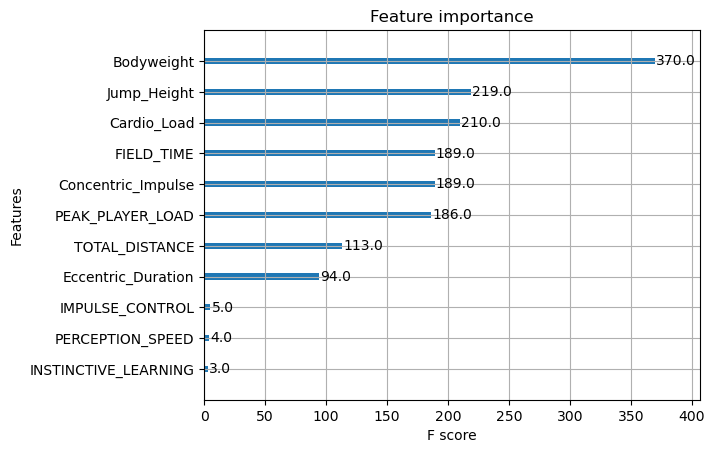

Average Cross-validation Mean-Squared Error: 253.74544066575135
Best XGBoost Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.7}


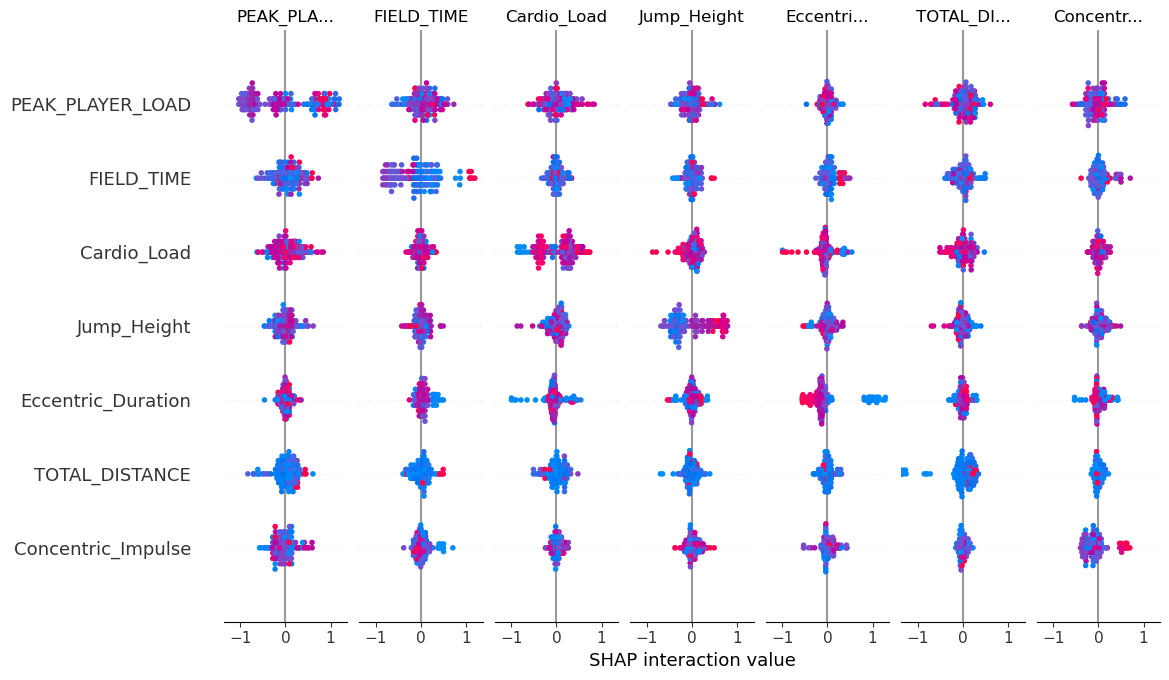

In [42]:
#import statsmodels.formula.api as smf

X = data_all.drop(columns = ["PFF_Tackling_Grade", "MUSCLE_MASS", "FAT_MASS", "Peak_Power"])
y = data_all["PFF_Tackling_Grade"]
X = pd.get_dummies(X, columns=["Position"], drop_first=True) # one hot encoding for Position

# model without hyperparameters
model = xgb.XGBRegressor(objective='reg:squarederror')

# hyperparameters to try out
param_grid = {
'max_depth': [3, 5, 7],
'learning_rate': [0.01, 0.05, 0.1],
'n_estimators': [50, 100, 200],
'subsample': [0.7, 0.8, 1.0]}    

# cross validation on each combo of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)    

# save best-performing parameters
best_params = grid_search.best_params_

# put best-performing parameters into XG Boost model
best_xg_model = xgb.XGBRegressor(max_depth=best_params['max_depth'],
                                learning_rate=best_params['learning_rate'],
                                n_estimators=best_params['n_estimators'],
                                subsample=best_params['subsample'])

# cross-validation on XGboost model
cv_results = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# fit XGBoost model with data
best_xg_model.fit(X, y)

# plot important model features
xgb.plot_importance(best_xg_model)
plt.show()  

# print MSE after cross-validation
print("Average Cross-validation Mean-Squared Error:", -cv_results.mean())    

# print best model hyperparameters
print("Best XGBoost Hyperparameters:", grid_search.best_params_)   

# get SHAP interaction values - how much feature contributes to prediction
explainer = shap.TreeExplainer(best_xg_model)
shap_ints = explainer.shap_interaction_values(X)

# plot SHAP interaction values
shap.summary_plot(shap_ints, X) # wider spread = more impact on predictions
